<a href="https://colab.research.google.com/github/parthib22/colaboratory/blob/main/Handwritten_Digit_Recognition_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [ ]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((28, 28, 1), input_shape=(None, None)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.reset_states()

In [ ]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0334 - accuracy: 0.9887
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0254 - accuracy: 0.9916
Epoch 3/3
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0204 - accuracy: 0.9929


In [ ]:
model.save('handwritten.model')

In [ ]:
# start here next time
model = tf.keras.models.load_model('handwritten.model')

In [ ]:
# opt
loss, accuracy = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1084 - accuracy: 0.9763


In [ ]:
# opt
print(loss)
print(accuracy)

0.16549260914325714
0.9779999852180481


1/1 [==============================] - 0s 23ms/step
This digit is probably a 0


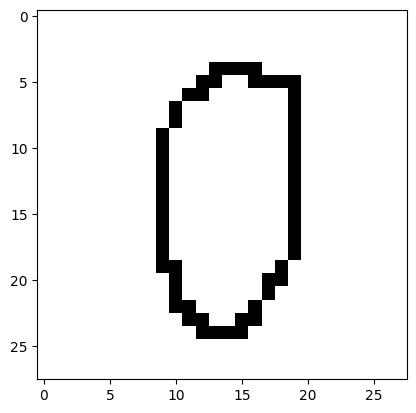

1/1 [==============================] - 0s 22ms/step
This digit is probably a 3


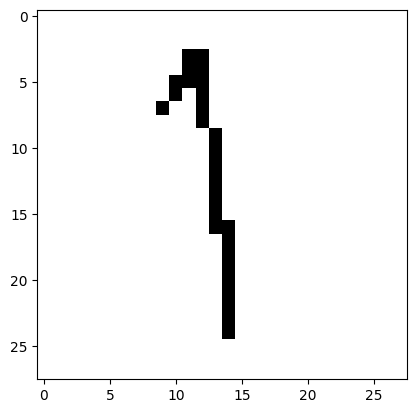

1/1 [==============================] - 0s 20ms/step
This digit is probably a 3


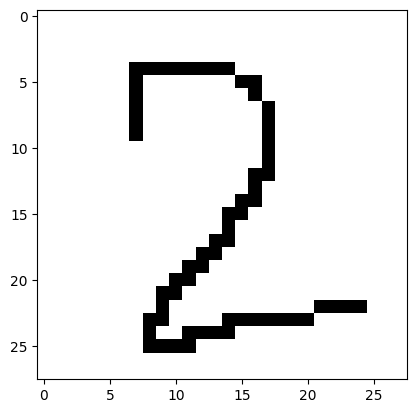

1/1 [==============================] - 0s 21ms/step
This digit is probably a 3


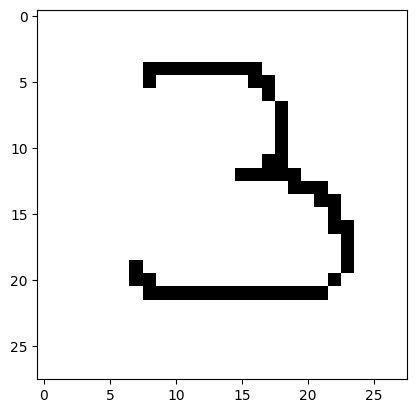

1/1 [==============================] - 0s 19ms/step
This digit is probably a 8


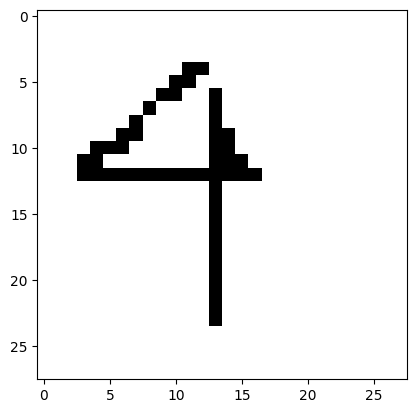

1/1 [==============================] - 0s 21ms/step
This digit is probably a 5


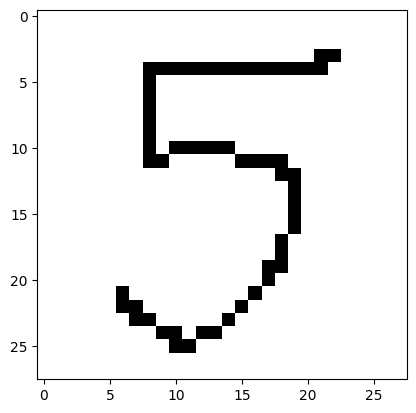

1/1 [==============================] - 0s 21ms/step
This digit is probably a 6


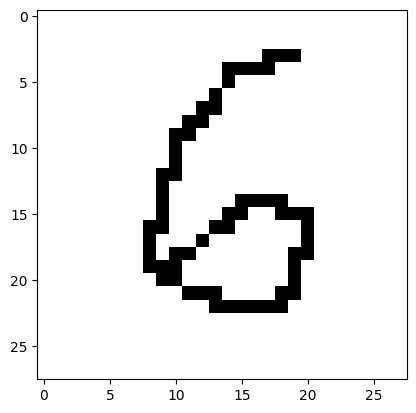

1/1 [==============================] - 0s 21ms/step
This digit is probably a 3


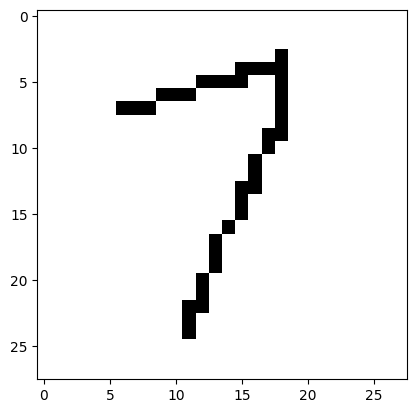

1/1 [==============================] - 0s 23ms/step
This digit is probably a 8


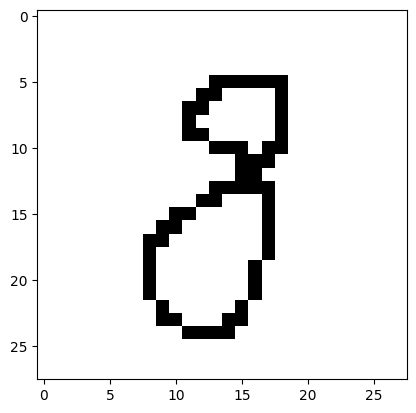

1/1 [==============================] - 0s 22ms/step
This digit is probably a 1


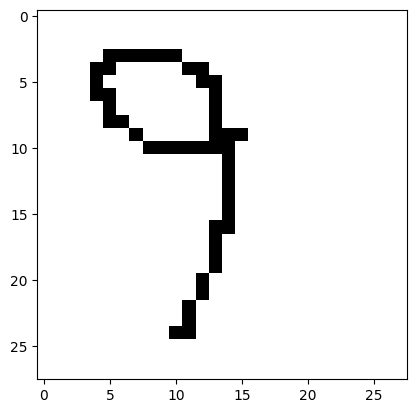

Manual test model accuracy: 0.5


In [ ]:
image_number = 0
count = 0
files = os.listdir(f"/content/drive/MyDrive/Testing_data/digits")
while os.path.isfile(f"/content/drive/MyDrive/Testing_data/digits/{image_number}.png"):
  try:
    img = cv2.imread(f"/content/drive/MyDrive/Testing_data/digits/{image_number}.png")[:,:,0]
    img = np.invert(np.array([img]))
    prediction = model.predict(img)
    print(f"This digit is probably a {np.argmax(prediction)}")
    plt.imshow(img[0], cmap=plt.cm.binary)
    plt.show()
  except:
    print("Error!")
  finally:
    if np.argmax(prediction) == image_number:
      count += 1
    image_number += 1
print(f"Manual test model accuracy: {count/len(files)}")